In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import datetime
import missingno

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Load the data

In [ ]:
# Import the dataset into a DataFrame

customer_df = pd.read_csv('Lab3_data_mod2.csv')
customer_df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40


In [ ]:
customer_df.shape

(200, 5)

In [ ]:
columns = customer_df.columns.values
columns

array(['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score'],
      dtype=object)

### Data Exploration and Visualisation

**Create plots to understand the distribution of the each feature in the data**

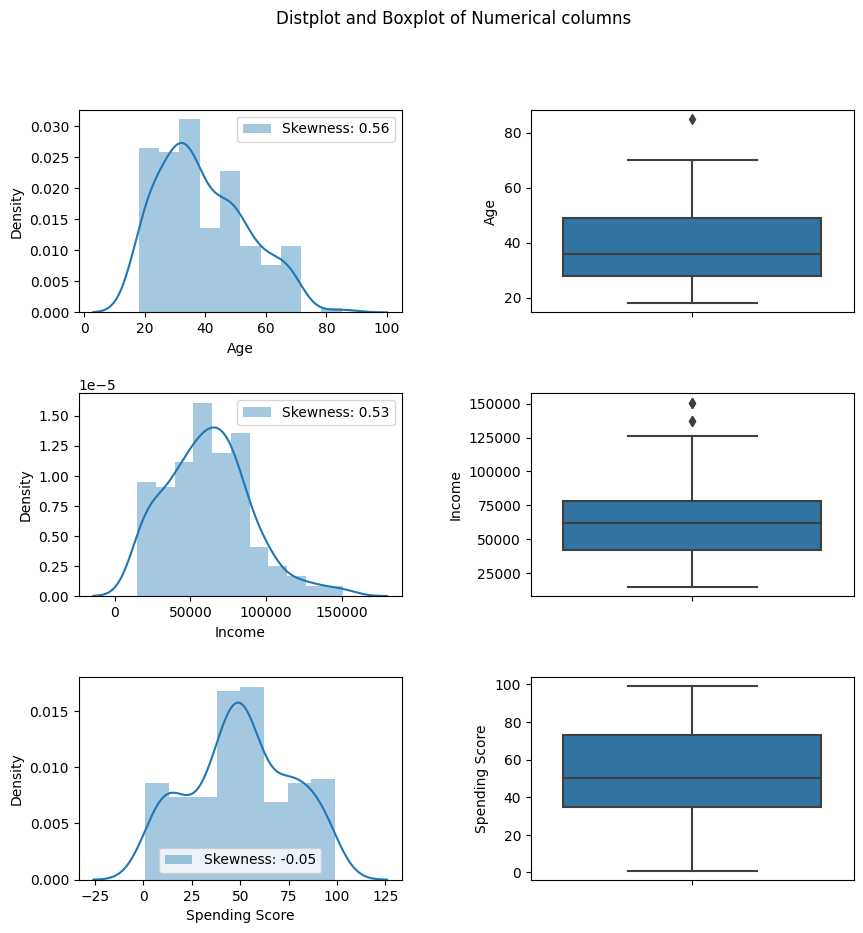

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.distplot(customer_df['Age'], label = 'Skewness: %.2f'%(customer_df['Age'].skew()), ax=axes[0,0])
axes[0,0].legend(loc = 'best')
sns.boxplot(y = customer_df['Age'], ax=axes[0,1])

sns.distplot(customer_df['Income'], label = 'Skewness: %.2f'%(customer_df['Income'].skew()), ax=axes[1,0])
axes[1,0].legend(loc = 'best')
sns.boxplot(y = customer_df['Income'], ax=axes[1,1])

sns.distplot(customer_df['Spending Score'], label = 'Skewness: %.2f'%(customer_df['Spending Score'].skew()), ax=axes[2,0])
axes[2,0].legend(loc = 'best')
sns.boxplot(y = customer_df['Spending Score'], ax=axes[2,1])

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
fig.suptitle('Distplot and Boxplot of Numerical columns')
plt.show()

# Observation - Skewed Distributions

In [64]:
fw1 = go.FigureWidget(px.violin(customer_df['Age'], box=True, height = 500, points='all', title = 'Violin plot for Age Column', color_discrete_sequence = ['blueviolet']))
fw2 = go.FigureWidget(px.violin(customer_df['Income'], box=True, points='all', title = 'Violin plot for Income Column', color_discrete_sequence = ['goldenrod']))
fw3 = go.FigureWidget(px.violin(customer_df['Spending Score'], box=True, height = 500, points='all', title = 'Violin plot for Spending Score Column', color_discrete_sequence = ['forestgreen']))

dashboard1=widgets.VBox([widgets.HBox([fw1, fw2]), widgets.HBox([fw3])])
dashboard1

    'data': [{'alignmentgroup': 'True',
              'box': {'vi…

In [ ]:
gender_vals = customer_df['Gender'].value_counts()
px.bar(gender_vals, title = 'Bar graph showing the counts of each Gender', text = gender_vals, color = gender_vals.index, height = 400, width = 500)

**Create plots to understand the distribution of data with respect to the other features**

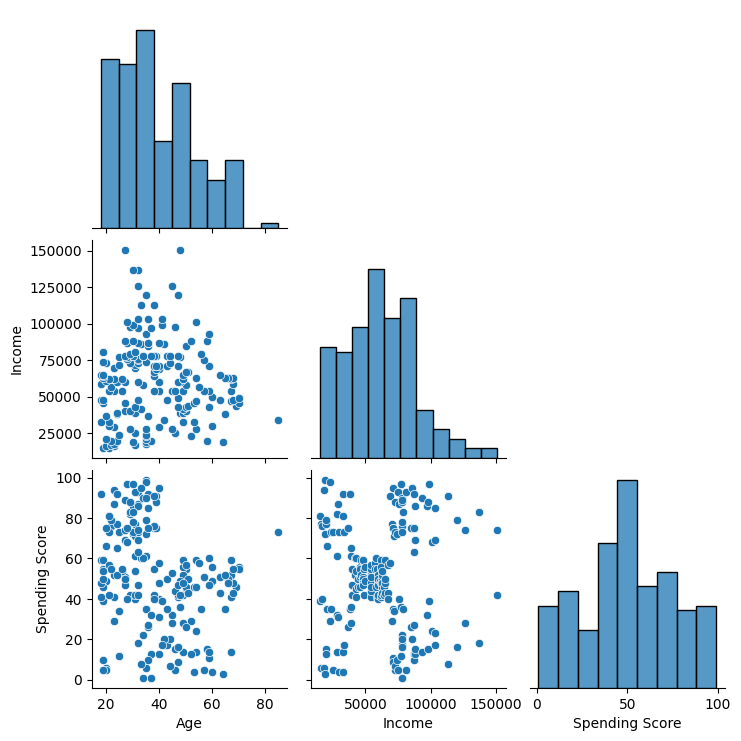

In [ ]:
# Correlation using pairplot

#customer_df_num = customer_df.select_dtypes(include = ['float64', 'int64']).drop('CustomerID')
customer_df_num = customer_df[['Age', 'Income', 'Spending Score']]

for i in range(0, len(customer_df_num.columns),5):
    sns.pairplot(customer_df_num, x_vars = customer_df_num.columns[i:i+3], corner = True)

In [ ]:
cols = customer_df_num.columns
correlation_matrix = customer_df_num[cols].corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale = 'tempo', width=600, height=400,
                title = 'Correlation heatmap of numerical columns')
fig.update_xaxes(side="top")

fig.show()

### Feature Preprocessing

In [ ]:
customer_df.duplicated().sum()

# Observation - Since the number returned is zero, it implies that every row in our dataset is unique.

0

In [ ]:
customer_df.info()

# Observation - From the "Non-Null Count" it can be seen that there are some missing vaues in the given data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             197 non-null    float64
 3   Income          197 non-null    float64
 4   Spending Score  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


**Checking for missing values and fill them**

In [ ]:
customer_df.isna().sum()

# Observation - There are 3 NaN values in the columns 'Age'and 'Income'.

CustomerID        0
Gender            0
Age               3
Income            3
Spending Score    0
dtype: int64

<Axes: >

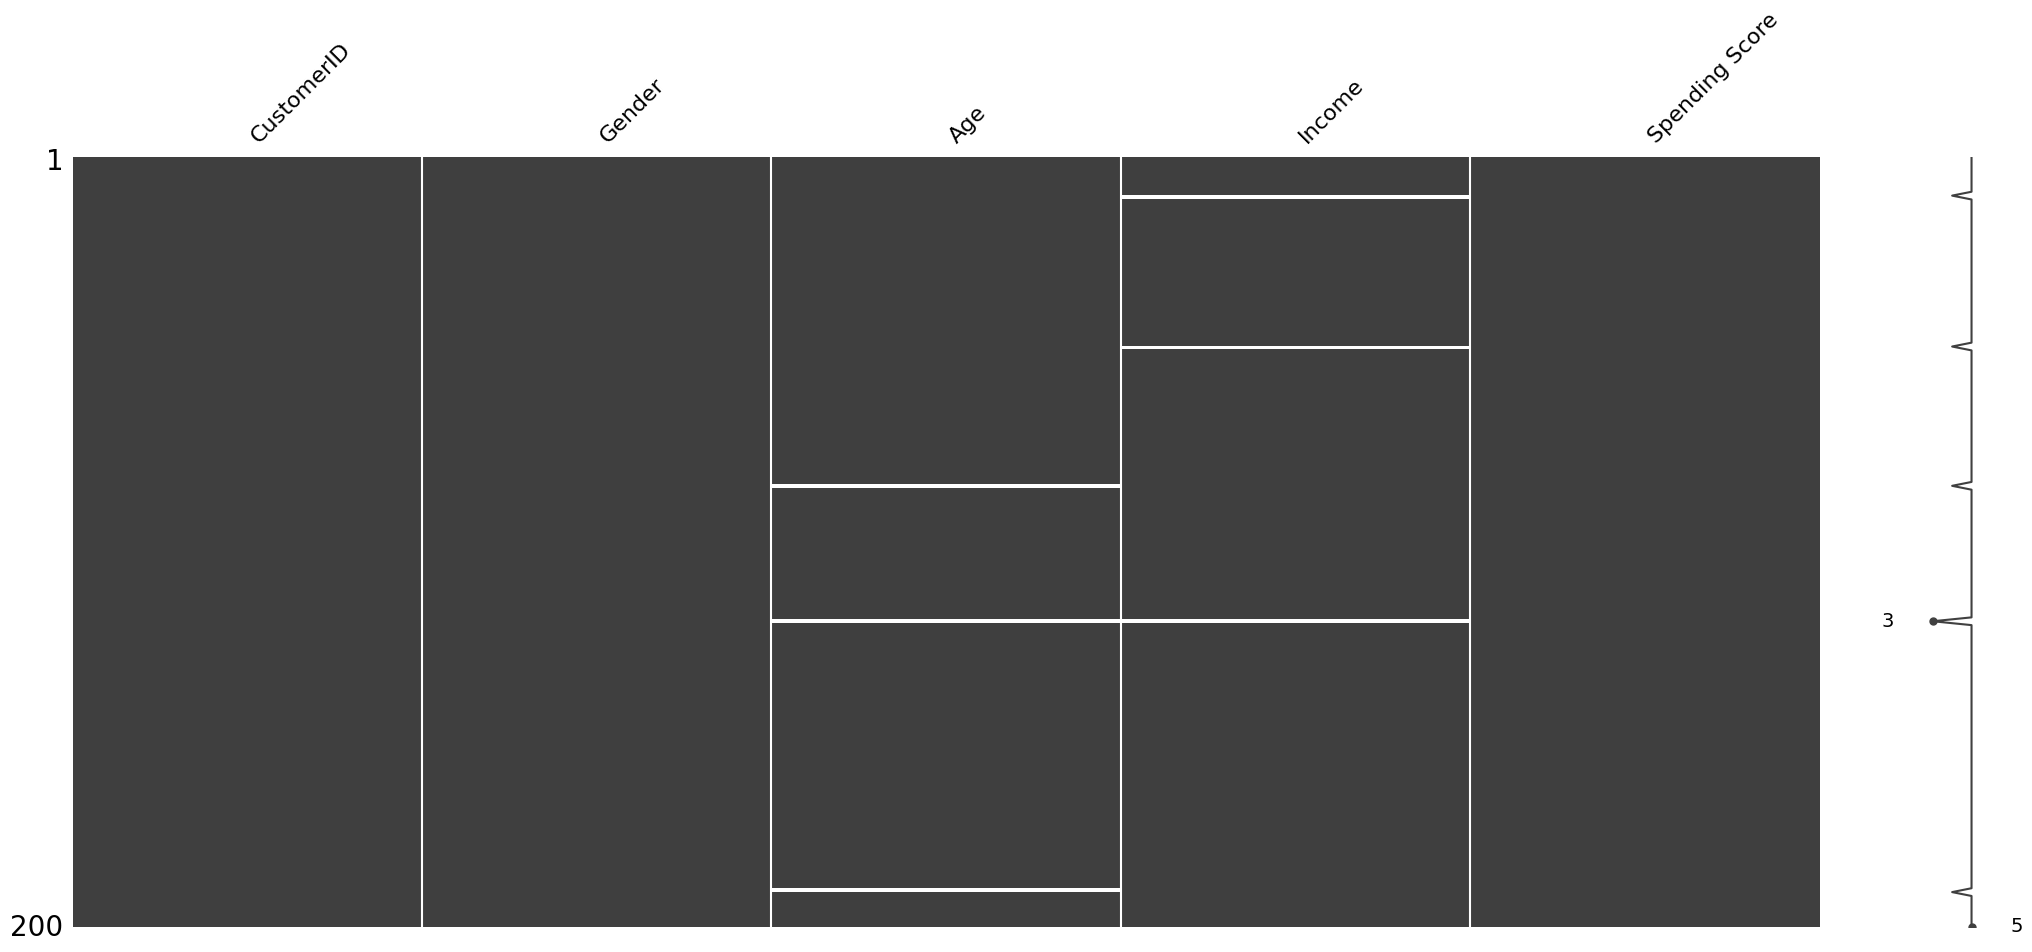

In [ ]:
# Visual representation of the missing data in the dataset

missingno.matrix(customer_df)

In [ ]:
''' To find the median of the values of the said column for a particular group '''

def find_median(col):
  median_value = customer_df[col].median()
  return median_value

In [ ]:
median_values = {}

In [ ]:
median_age = find_median('Age')
median_values['Age'] = median_age
median_age

36.0

In [ ]:
median_income = find_median('Income')
median_values['Income'] = median_income
median_income

62000.0

In [ ]:
customer_df.fillna(value = median_values, inplace = True)

customer_df.isna().sum()

# Observation - There are no more NaN values remaining in the columns 'Age'and 'Income'.

CustomerID        0
Gender            0
Age               0
Income            0
Spending Score    0
dtype: int64

**Identify any outliers and remove them**

---

Since the distribution of the numerical columns are skewed, outliers are detected using Inter-Quartile Range (IQR) proximity rule


In [ ]:
def find_upper_outliers(col, upper_limit):
  outliers = customer_df[customer_df[col] > upper_limit]
  num_outliers = len(outliers)
  print(f'Number of upper outliers = {num_outliers}')
  return outliers

In [ ]:
def find_lower_outliers(col, lower_limit):
  outliers = customer_df[customer_df[col] < lower_limit]
  num_outliers = len(outliers)
  print(f'Number of lower outliers = {num_outliers}')
  return outliers

In [ ]:
def find_ouliers(col):
  # Finding lower quartile
  Q1 = customer_df[col].quantile(0.25)
  print('Lower quartile = ', Q1)

  # Finding upper quartile
  Q3 = customer_df[col].quantile(0.75)
  print('Upper quartile = ', Q3)

  # Finding IQR value
  IQR = Q3 - Q1
  print('IQR = ', IQR)

  # Finding upper limit for outlier detection
  upper_limit = Q3 + 1.5 * IQR
  print('\nUpper limit = ', upper_limit)

  # Finding lower limit for outlier detection
  lower_limit = Q1 - 1.5 * IQR
  print(f'Lower limit = {lower_limit}\n')

  # Finding upper outliers
  outliers_upper = find_upper_outliers(col, upper_limit)
  indices = list(outliers_upper.index)

  # Finding lower outliers
  outliers_lower = find_lower_outliers(col, lower_limit)
  indices.extend(outliers_lower.index)

  outliers = outliers_upper.append(outliers_lower)
  return outliers, indices


In [ ]:
# Finding outliers for Age column

outliers_age, indices_age = find_ouliers('Age')

Lower quartile =  28.75
Upper quartile =  49.0
IQR =  20.25

Upper limit =  79.375
Lower limit = -1.625

Number of upper outliers = 1
Number of lower outliers = 0


In [ ]:
indices_age

[37]

In [ ]:
outliers_age

,CustomerID,Gender,Age,Income,Spending Score
37,38,Female,85.0,34000.0,73


In [ ]:
# Finding outliers for Income column

outliers_income, indices_income = find_ouliers('Income')

Lower quartile =  42750.0
Upper quartile =  78000.0
IQR =  35250.0

Upper limit =  130875.0
Lower limit = -10125.0

Number of upper outliers = 4
Number of lower outliers = 0


In [ ]:
indices_income

[98, 147, 198, 199]

In [ ]:
outliers_income

,CustomerID,Gender,Age,Income,Spending Score
98,99,Male,48.0,150250.0,42
147,148,Female,27.0,150753.0,74
198,199,Male,32.0,137000.0,18
199,200,Male,30.0,137000.0,83


In [ ]:
# Finding outliers for Spending Score column

outliers_spend, indices_spend = find_ouliers('Spending Score')

Lower quartile =  34.75
Upper quartile =  73.0
IQR =  38.25

Upper limit =  130.375
Lower limit = -22.625

Number of upper outliers = 0
Number of lower outliers = 0


In [ ]:
indices_age.extend(indices_income)
indices_age.extend(indices_spend)
indices = indices_age
indices

[37, 98, 147, 198, 199]

In [ ]:
# Remove the outliers

customer_df = customer_df.drop(index = indices)
customer_df.shape

# Observation - 5 Outlier rows have been removed

(195, 5)

**1. Perform feature scaling**

 **2. Encode categorical features into numerical data**

In [ ]:
numeric_features = ['Age', 'Income', 'Spending Score']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
categorical_features = ['Gender']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    verbose_feature_names_out = True)

In [ ]:
customer_df.drop('CustomerID', axis = 1, inplace = True)
customer_df.columns.values

array(['Gender', 'Age', 'Income', 'Spending Score'], dtype=object)

In [ ]:
transformed_data = preprocessor.fit_transform(customer_df)

In [ ]:
preprocessor.feature_names_in_

array(['Gender', 'Age', 'Income', 'Spending Score'], dtype=object)

In [ ]:
col_names = list(map(lambda x: x.split('__')[1], preprocessor.get_feature_names_out()))
col_names

['Age', 'Income', 'Spending Score', 'Gender_Female', 'Gender_Male']

In [ ]:
transformed_df = pd.DataFrame(transformed_data, columns = col_names)
transformed_df.head()

,Age,Income,Spending Score,Gender_Female,Gender_Male
0,-1.424678,-1.801498,-0.426965,0.0,1.0
1,-1.281918,-1.801498,1.203266,0.0,1.0
2,-1.353298,-1.761583,-1.707861,1.0,0.0
3,-1.139157,-1.761583,1.048006,1.0,0.0
4,-0.568114,-1.721668,-0.388150,1.0,0.0


## Perform clustering using DBSCAN

In [ ]:
transformed_df.drop('Gender_Female', axis = 1, inplace =True)
transformed_df.drop('Gender_Male', axis = 1, inplace =True)

In [ ]:
transformed_df.columns

Index(['Age', 'Income', 'Spending Score'], dtype='object')

In [ ]:
epsilon_range = list(np.arange(0.3, 1.1, 0.1))
n_samp_range = range(3, 6 + 1)

In [ ]:
sil_df = pd.DataFrame(columns = list(n_samp_range), index = epsilon_range)
sil_df

,3,4,5,6
0.3,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN
0.9,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN


In [ ]:
for ep in epsilon_range:
  for min_p in n_samp_range:
    #clt = Pipeline(steps=[('preprocessor', preprocessor),
                    #  ('clusterer', DBSCAN(eps = ep, min_samples = min_p))])

    #pipe_fit = clt.fit_transform(customer_df)
    #clustering = pipe_fit[-1].labels_
    clustering = DBSCAN(eps = ep, min_samples = min_p).fit(transformed_df)
    n_clusters = len(set(clustering.labels_))

    silhouette_avg = silhouette_score(transformed_df, clustering.labels_)
    print(f'The average silhouette_score for epison = {ep} and minPoints = {min_p} is : {silhouette_avg}\t n_clusters = {n_clusters}')

    sil_df.loc[ep, min_p] = silhouette_avg
  print()

The average silhouette_score for epison = 0.3 and minPoints = 3 is : -0.09091047997505972	 n_clusters = 13
The average silhouette_score for epison = 0.3 and minPoints = 4 is : -0.10532282165281859	 n_clusters = 9
The average silhouette_score for epison = 0.3 and minPoints = 5 is : -0.19914827198051324	 n_clusters = 11
The average silhouette_score for epison = 0.3 and minPoints = 6 is : -0.21709088175675248	 n_clusters = 4

The average silhouette_score for epison = 0.4 and minPoints = 3 is : 0.06040437906532299	 n_clusters = 10
The average silhouette_score for epison = 0.4 and minPoints = 4 is : 0.027062311089518083	 n_clusters = 7
The average silhouette_score for epison = 0.4 and minPoints = 5 is : 0.00025489891414393035	 n_clusters = 9
The average silhouette_score for epison = 0.4 and minPoints = 6 is : -0.008616371048534906	 n_clusters = 9

The average silhouette_score for epison = 0.5 and minPoints = 3 is : 0.10824010478498591	 n_clusters = 11
The average silhouette_score for epison

In [ ]:
sil_df

,3,4,5,6
0.3,-0.09091,-0.105323,-0.199148,-0.217091
0.4,0.060404,0.027062,0.000255,-0.008616
0.5,0.10824,0.12607,0.115131,0.107302
0.6,0.173228,0.155417,0.190325,0.074557
0.7,0.137517,0.139036,0.22941,0.216997
0.8,0.258272,0.254767,0.246865,0.246865
0.9,0.256627,0.256627,0.276775,0.262002
1.0,0.256627,0.256627,0.256627,0.276775


In [ ]:
fig = px.imshow(sil_df, text_auto = True, aspect = 'auto', color_continuous_scale = 'sunset', width = 600, height = 400, title = 'Heatmap of Epsilon, minPoints and Silhouette scores')
fig.update_xaxes(side = 'top')

fig.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(transformed_df)
distances, indices = nbrs.kneighbors(transformed_df)

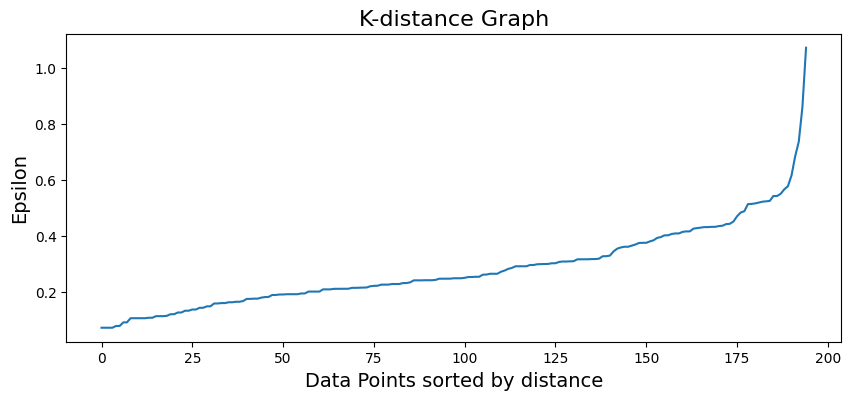

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=16)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Observation = Epilon value is approximately 0.5

**Therefore, optimal epison = 0.5 and minPoints = 5**

---



---



**Using the optimal hyperparameters, fit a DBSCAN model on your data**

In [ ]:
clustering = DBSCAN(eps = 0.5, min_samples = 5).fit(transformed_df)
predicted_labels = clustering.labels_
predicted_labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -1,  0, -1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2, -1,  2, -1,  2,  3,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1, -1,  2,  3,  2,  3,  2,  3,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2, -1, -1,  3,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
cluster_ids = set(predicted_labels)
cluster_ids

{-1, 0, 1, 2, 3}

In [ ]:
n_clusters = len(cluster_ids)
n_clusters

# Observation - The number of clusters formed by DBSCAN for epislon = 0.5 and minPoints = 5 is 5.

5

In [ ]:
num_noise = np.count_nonzero(predicted_labels == -1)
num_noise

63

[]

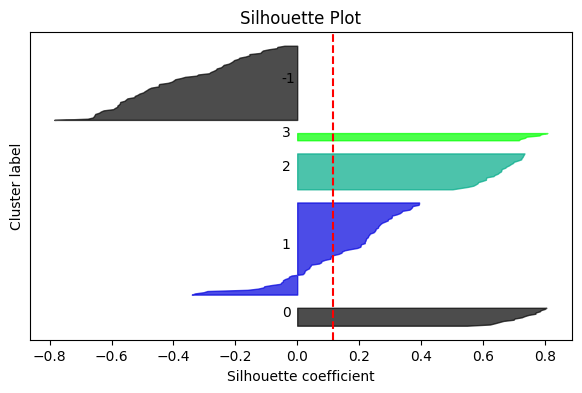

In [65]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 4)

sample_silhouette_values = silhouette_samples(transformed_df, predicted_labels)
silhouette_avg = silhouette_score(transformed_df, predicted_labels)

y_lower = 10

for i in cluster_ids:
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[predicted_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor = color,
        edgecolor = color,
        alpha = 0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title('Silhouette Plot')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax1.axvline(x = silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])  # Clear the yaxis labels / ticks


### Visualize clusters

**Visualize the clusters formed by plotting points in 2D for 'spending score' and 'annual income'**

In [66]:
fw1 = go.FigureWidget(px.scatter(customer_df, x = 'Spending Score', y = 'Income', width = 700, height = 500, color_discrete_sequence = ['chocolate'],
                                 title = 'Income v/s Spending Score'))
fw2 = go.FigureWidget(px.scatter(transformed_df, x = 'Spending Score', y = 'Income', width = 700, height = 500, color_discrete_sequence = ['darkmagenta'],
                                 title = 'Standardized Income v/s Spending Score'))

dashboard2 = widgets.VBox([widgets.HBox([fw1, fw2])])
dashboard2

    'data': [{'hovertemplate': 'Spending Score=%{x}<br>Income=%{y…

In [ ]:
fig = go.Figure()


trace_1 = go.Scatter(x = transformed_df.loc[predicted_labels == 0, 'Spending Score'],
                     y = transformed_df.loc[predicted_labels == 0, 'Income'],
                     name = 'Cluster 1',
                     mode = 'markers',
                     marker=go.Marker(color = 'slateblue'),
                     showlegend=True
)

trace_2 = go.Scatter(x = transformed_df.loc[predicted_labels == 1, 'Spending Score'],
                     y = transformed_df.loc[predicted_labels == 1, 'Income'],
                     name = 'Cluster 2',
                     mode = 'markers',
                     marker = go.Marker(color = 'goldenrod'),
                     showlegend = True
)

trace_3 = go.Scatter(x = transformed_df.loc[predicted_labels == 2, 'Spending Score'],
                     y = transformed_df.loc[predicted_labels == 2, 'Income'],
                     name = 'Cluster 3',
                     mode = 'markers',
                     marker = go.Marker(color = 'chocolate'),
                     showlegend = True
)

trace_4 = go.Scatter(x = transformed_df.loc[predicted_labels == 3, 'Spending Score'],
                     y = transformed_df.loc[predicted_labels == 3, 'Income'],
                     name = 'Cluster 4',
                     mode = 'markers',
                     marker = go.Marker(color = 'indianred'),
                     showlegend = True
)

trace_5 = go.Scatter(x = transformed_df.loc[predicted_labels == -1, 'Spending Score'],
                     y = transformed_df.loc[predicted_labels == -1, 'Income'],
                     name = '(5) Noise Cluster',
                     mode = 'markers',
                     marker = go.Marker(color = 'plum'),
                     showlegend = True
)


fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)
fig.add_trace(trace_4)
fig.add_trace(trace_5)
fig.update_layout(width = 800, height=500)
fig.update_layout({'title': {'text': 'Clustered Data Plot - Income v/s Spending Score'}})

fig.show()
fig.write_image('Clustered Data Plot - Income vs Spending Score.png')

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




**Visualize clusters formed by plotting points in 3D for 'spending score' and 'annual income' and 'age'**

In [67]:
fig1 = px.scatter_3d(customer_df, x = 'Spending Score', y = 'Income', z = 'Age', width = 700, height = 500, color_discrete_sequence = ['plum'],
                                 title = 'Income v/s Spending Score v/s Age')
fig1.update_traces(marker_size = 4)

fig2 = px.scatter_3d(transformed_df, x = 'Spending Score', y = 'Income', z = 'Age', width = 700, height = 500, color_discrete_sequence = ['sandybrown'],
                                 title = 'Standardized Income v/s Spending Score v/s Age')
fig2.update_traces(marker_size = 4)

fw1 = go.FigureWidget(fig1)
fw2 = go.FigureWidget(fig2)


dashboard3 = widgets.VBox([widgets.HBox([fw1, fw2])])
dashboard3

    'data': [{'hovertemplate': 'Spending Score=%{x}<br>Income=%{y…

In [ ]:
fig = go.Figure()


trace_1 = go.Scatter3d(x = transformed_df.loc[predicted_labels == 0, 'Spending Score'],
                       y = transformed_df.loc[predicted_labels == 0, 'Income'],
                       z = transformed_df.loc[predicted_labels == 0, 'Age'],
                       name = 'Cluster 1',
                       mode = 'markers',
                       marker=go.Marker(color = 'slateblue'),
                       showlegend=True
)

trace_2 = go.Scatter3d(x = transformed_df.loc[predicted_labels == 1, 'Spending Score'],
                       y = transformed_df.loc[predicted_labels == 1, 'Income'],
                       z = transformed_df.loc[predicted_labels == 1, 'Age'],
                       name = 'Cluster 2',
                       mode = 'markers',
                       marker = go.Marker(color = 'goldenrod'),
                       showlegend = True
)

trace_3 = go.Scatter3d(x = transformed_df.loc[predicted_labels == 2, 'Spending Score'],
                       y = transformed_df.loc[predicted_labels == 2, 'Income'],
                       z = transformed_df.loc[predicted_labels == 2, 'Age'],
                       name = 'Cluster 3',
                       mode = 'markers',
                       marker = go.Marker(color = 'chocolate'),
                       showlegend = True
)

trace_4 = go.Scatter3d(x = transformed_df.loc[predicted_labels == 3, 'Spending Score'],
                       y = transformed_df.loc[predicted_labels == 3, 'Income'],
                       z = transformed_df.loc[predicted_labels == 3, 'Age'],
                       name = 'Cluster 4',
                       mode = 'markers',
                       marker = go.Marker(color = 'indianred'),
                       showlegend = True
)

trace_5 = go.Scatter3d(x = transformed_df.loc[predicted_labels == -1, 'Spending Score'],
                       y = transformed_df.loc[predicted_labels == -1, 'Income'],
                       z = transformed_df.loc[predicted_labels == -1, 'Age'],
                       name = '(5) Noise Cluster',
                       mode = 'markers',
                       marker = go.Marker(color = 'plum'),
                       showlegend = True
)


fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)
fig.add_trace(trace_4)
fig.add_trace(trace_5)
fig.update_traces(marker_size = 4)

fig.update_layout(width = 800, height=500)
fig.update_layout({'title': {'text': 'Clustered Data Plot - Income v/s Spending Score v/s Age'}})

fig.show()
fig.write_image('Clustered Data Plot - Income vs Spending Score vs Age.png')